# Лекция 1: Основы теории вероятности


## Случайные величины

Мир вокруг нас изобилует случайными величинами. Интуитивно, мы можем назвать ту или иную величину случайной, когда она принимает одно из нескольких возможных значений. Более строго, случайной величиной называется [переменная, значения которой представляют собой численные исходы некоторого случайного феномена или эксперимента](https://ru.wikipedia.org/wiki/%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%B0%D1%8F_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D0%B0). Таким образом, понятие случайной величины неразрывно связано с измерением. Примерами случайной величины могут быть 
- Значение броска кости (числа от одного до шести с равной вероятностью)
- Количество нераспавшихся ядер в образце урана (экспоненциально убывающее число)
- Конверсия пользователя при посещени сайта (описывается законом Бернулли)
- Количество машин проехавших перекресток в час пик (описывается законом Пуассона)
- Средний чек ресторана во вторник (описывается нормальным распределением)

Во  всех приведенных примерах численное значение случайной величины было обнаружено в ходе измерения.

In [1]:
# В рамках курса нам понадобится много случайных чисел.
# Для получения (псевдо)случайных чисел можно воспользоваться библиотекой random
# Для воспроизводимости результатов полезно использовать функцию seed которая
# задает псевдослучайную последовательность чисел: без этой строки ячейка кода возвращала бы 
# разные значения при каждом перезапуске.
from random import random, seed
seed(42)
print("Случайное число из [0,1):",random())


Случайное число из [0,1): 0.6394267984578837


Интересно, что в основе случайной величины далеко не всегда лежит случай (другими словами, случайная величина не всегда имеет стохастическую основу). Например, если вы посмотрите сейчас на часы, то последняя цифра количества секунд тоже является случайной величиной, хоть и необычной - ее значения будут различны для читателей этого материала, но были бы скоррелированы для слушателей лекции. Таким образом, случайная величина позволяет учитывать  как стохастические факторы эксперимента, так и скрытые процессы выходящие за рамки модели.

В качестве дополнительного примера, рассмотрим количество посещений сайта интернет-магазина за день. Если аггрегировать данные за несколько месяцев, число посетителей можно будет описать нормальным распределением с каким-то средним и дисперсией. Разброс значений происходит как из-за чисто случайных причин, так и из-за того что мы проигнорировали зависимость траффика ото дня недели. Учет дня недели позволяет уменьшить разброс значений.

Насколько глубокой можно построить модель? Можно ли объяснить скрытыми параметрами все флуктуации? Это открытый фундаментальный вопрос в квантовой механике (Знаменитая цитата Эйнштейна про "Бог не играет в кости" как раз про это), но в случае с прикладной статистикой мы всегда ограничены имеющимися данными -  анализируя больше и больше факторов, разбивая данные на все большее число корзин, мы рано или поздно перестанем отличать реальные тренды и закономерности от флуктуаций. Так что в нашем случае ответ будет "можно пытатьася покуда хватает данных".

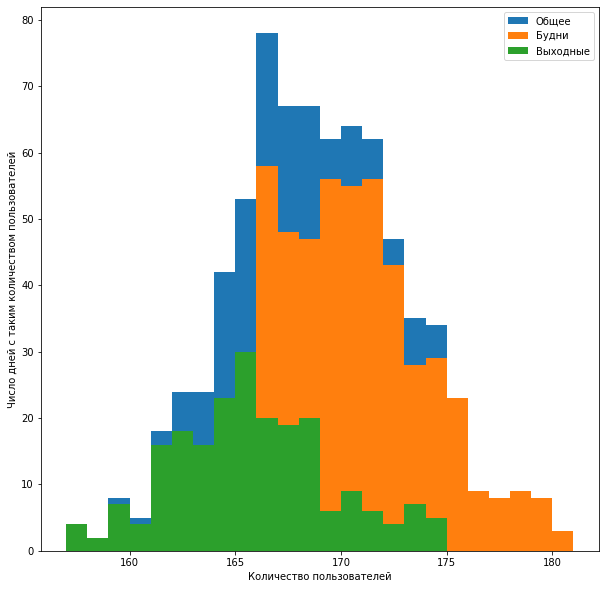

In [2]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
f = plt.figure(figsize = (10, 10))
n_weeks = 108
workdays = poisson.rvs(mu = 15, loc = 155, size = 5*n_weeks)
weekends = poisson.rvs(mu = 15, loc = 150, size = 2*n_weeks)
total = np.concatenate((workdays, weekends))
ul, ll = total.max(), total.min()
bins = ul - ll
plt.hist(total, label = "Общее", range = [ll, ul], bins = bins)
plt.hist(workdays, label = "Будни", range = [ll, ul], bins = bins)
plt.hist(weekends, label = "Выходные", range = [ll, ul], bins = bins)
plt.ylabel("Число дней с таким количеством пользователей")
plt.xlabel("Количество пользователей")
plt.legend()

Сравните общее распределение дневного числа пользователей сайта с разбивкой по признаку выходной/будний день недели. Если аналитик не обратит внимание на разницу поведения пользователей в зависимости от дней недели, эта разница будет включена в дисперсию общего значения. Это сделает предсказания менее точными.

## Вероятность

Слуайная величина "средний чек ресторана во вторник" принимает определенное значение во вторник вечером. Мы можем поверить что эта сумма будет, скажем, "пять тысяч рублей", но вот "три миллиона долларов" определенно будет неожиданной. Таким образом, одни значения случайной величины более _вероятны_ чем другие. 

Приняте случайной величиной определенного значения можно назвать наступлением случайного события. Случайное событие наступает в ходе эксперимента и мы воспользуемся термином "случайное событие" для разговора о вероятности. 

Одним из определений вероятности наступления случайного события $A$ в ходе эксперимента является предел отношения числа экспериментов в которых наступило это событие ($n$) к общему числу экспериментов ($N$) при стремелении числа экспериментов к бесконечности:

$$p(A) = \lim_{N\to\infty}\frac{n}{N}$$

Ниже приведен пример вероятности выпадения "орла" при броске монетки.


Text(0.5, 0, 'Номер эксперимента')

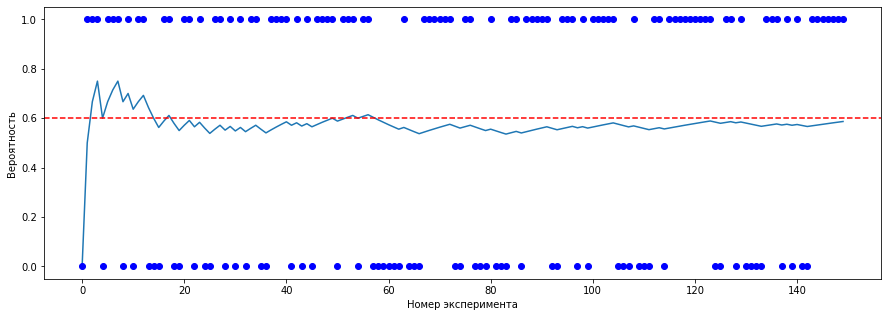

In [3]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
f = plt.figure(figsize = (15, 5))
size = 150
true_prob = 0.6
x = range(size)
expts = bernoulli.rvs(p = true_prob, size = size)
probs = [sum(expts[0:i+1])/(i+1) for i in x]
plt.plot(x, probs)
plt.plot(x, expts, 'bo')
plt.axhline(true_prob, color = "red", ls = '--')
plt.ylabel("Вероятность")
plt.xlabel("Номер эксперимента")

В ходе набора данных вероятность сходится к постоянному значению. Отметим, что это постоянное значение не известно зарание. В нашем случае это значение 0.6 - явный признак того что монета в эксперименте фальшивая.

Классическая (частотная) вероятность привлекательна интуитивной понятностью, но ее определение требует бесконечного числа экспериментов. В ряде случаев это ограничение можно обойти проведя много (пусть и не бесконечно) одинаковых экспериментов. Например, классическая вероятность часто используется физике частиц для описания экспериментов с огромным количеством распадов идентичных частиц. Но что если невозможно провести много экспериментов? Что если невозможно провести даже один эксперимент? Как с позиций классической статистики оценить вероятность гибели пациента от редкого заболевания?

Для ответа на эти вопросы на помощь приходит другая интерпретация вероятности названая в честь Томаса Байеса (термин "байесовская вероятность" появился в середине двадцатого века, спустя почти двести лет после смерти Байеса). Байесовская вероятность определяется как степень уверенности в наступлении случайного события. Байесовская вероятность субъективна и по определению учитывает присутствие экспериментатора.
Таким образом, байесовская вероятность может существовать даже для событий которые никогда не происходили. Букмекеры, например, делаюь прогнозы на спортивные события именно исходя из байесовской вероятности. 

В этом заключается сила и слабость байесовской вероятонсти. Два разных эксприментатора могут иметь разную степень уверенности в наступлении случайного события - что, кстати, часто происходит с клиентами букмекеров, ставящих на разные исходы матча. Поэтому в работе с байесовской вероятностью необходимо четко описывать _априорные_ вероятности - убеждаения экспериментаторов сформированные до эксперимента. Статистические методы позволяют строго преобразовывать эти убеждения в соответствии с данными, но отправная точка все же зависит от исследователя.

## Аксиомы вероятности
Классическая и байесовская вероятности одного и того же случайного события могут иметь разные значения. Более того, может существовать бесконечно много байесовских значенй вероятности (в зависимости от априорных убеждений наблюдателя). Что же далет все эти величины вероятностями? Есть ли какие-то общие свойства у всех этих значений?

Андрей Николаевич Колмогоров предложил набор аксиом позволяющий четко определить понятие вероятности. Вероятность определена на множесте элементарных событий X. 

    Например, множество событий выпадений одной из грани кубика. Эти события элементарны, так как у кубика выпадает одна и только одна грань.
    
На этом множестве можно определить объединение и пересечение событий.

    Например, суммой событий "Выпадение 1" и "Выпадение 2" будет событие осуществляющееся при выпадении 1 или 2. Пересечением событий "Выпадение четного числа" и "Выпадение числа больше 2" является событие наступающее при выпадении 4 или 6.
    
Пустое множество событий является невозможным событием. Вероятность события является мерой определяемой тремя аксиомами:

- Вероятность $P$ события $A$ пространства $X$ неотрицательна: $\forall A \in X: P(A)\geq0$
- Если собвтия $A_1$ и $A_2$ взаимноисключающие, вероятность их объединения равна сумме их вероятности: $P(A_1 +  A_2) = P(A_1)+P(A_2)$. 

    _В примее с костями, вероятность выпадения 1 или 2 (1/3) будет равна сумме вероятностей выпадения 1 и 2 (1/6 и 1/6). Это справедливо только для взаимоисключающих событий: вероятность выпадения четного числа или числа больше 2 (5/6) не равна сумме вероятности выпадения четного числа (1/2) и числа больше 2 (2/3)._
    
    
- Вероятность события состоящего из суммы всех событий пространства $X$ равна 1: $P(X) = 1$

    _В примере с костями это эквивалентно утверждению о том что на кубике выпадет одно из чисел от 1 до 6. Если мы считаем что кубик может зависнуть в воздухе. мы  должны включить это событие в множество событий X_
    
Итак, аксиомы определяют не столько вероятность конкретного события, сколько вероятности всех событий сразу. Это оставляет пространство для маневра в определении индивидуальных вероятностей о котором мы говорили выше: вероятность выпадения орла может быть 50%, а может быть 10% - оба числа подходят если вероятности решки будут 50% и 90% соответственно.



## Совместная и условная вероятности

Представим себя на месте менеджера по работе с клиентами в банке который обзванивает клиентов и предлагает им кредитный договор. Рассмотрим два события - клиент поднимает трубку (событие A) и клиент берет на кредит (событие B). Диаграмма Венна для этих событий представвлена ниже.  Обратите внимание, что клиент может заключить договор и без звонка из банка - например, самостоятельно придя в отделение.

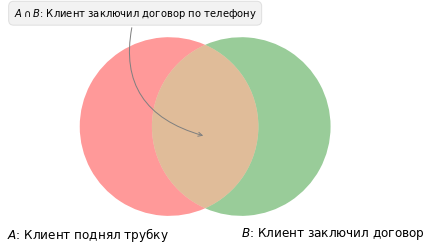

In [4]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
set1 = set(['A','B'])
set2 = set(['B','C'])
out = venn2([set1, set2], set_labels = ('$A$: Клиент поднял трубку', '$B$: Клиент заключил договор'))
for idx, subset in enumerate(out.subset_labels):
    out.subset_labels[idx].set_visible(False)
    
    
plt.annotate('$A\cap B$: Клиент заключил договор по телефону', xy=out.get_label_by_id('11').get_position() - np.array([0, 0.05]), xytext=(-70,120),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

Общая вероятность заключить договор после звонка - это вероятность совместного наступления событий A и B: $P(A\cap B)$. Такая величина называется совместной вероятностью (joint probability). 

Для менеджера, однако, более важной величиной является конверсия - вероятность заключить договор с клиентом который поднял трубку. Эта величина называется условной вероятностью (conditional probability) $P(B|A)$ - вероятность наступления события $B$ при условии события $A$. Из диаграмы Венна видно, что эта величина определяется формулой:

$$P(B|A) = \frac{P(A\cap B)}{P(A)}$$



## Формула полной вероятности
Пусть событие $A$ является суммой взаимоисключающих событий $B_i$:

$$A = \sum_i B_i$$
$$\forall i\neq j: P(B_i\cap B_j)=0$$

По второй аксиоме Колмогорова, вероятность  наступления суммы взаимоисключающих событий равна сумме их вероятностей:

$$P(A)=P(\sum_i B_i)=\sum_i P(B_i)$$

Наступление любого события $B_i$ будет означать также наступление события $A$, поэтому $P(B_i)\equiv P(B_i\cap A)$:

$$P(A)=\sum_i P(B_i\cap A)$$

Подставив выражение совместной вероятности через условную, получим:

$$P(A) = \sum_i P(A|B_i)P(B_i)$$

Это выражение носит название полной вероятности. В примерах ниже мы воспользуемся им для вычисления знаменателя в формуле Байеса.

## Формула Байеса

Из определения условной вероятности можно вывести связь условных вероятностей двух событий:

$$P(B\cap A) = P(B|A)\times P(A) = P(A|B) \times P(B)$$


$$P(B|A) = \frac{P(A|B) \times P(B)}{P(A)}$$

Это соотношение называется формулой (или теоремой) Байеса. Оно лежит в основе Байесовского подхода к статистике. 


Рассмотрим несколько примеров использования этого соотношения.

### COVID-19

Допустим, ковид-тест на антитела дает положительные результат для здорового человека с вероятностью 0.2% (Специфичность теста составляет 99.8%) и абсолютно точно определяет больного человека. Пассажир прилетевший из Германии делает тест в аэропорту и обнаруживает положительный результат. С какой вероятностью он болен? (На момент составления задачи, население Германии составляет 83млн. человек из которых 280тыс. больны коронавирусом).

Воспользуемся формулой Байеса. Мы хотим узнать вероятность болезни при условии положительного теста: $P(Болен|Полож.\ тест)$. Получаем:

$$P(Болен|Полож.\ тест) = \frac{P(Полож.\ тест|Болен)\times P(Болен)}{P(Полож.\ тест)}$$

В правой части нам известна только вероятность положительного теста при условии болезни $P(Полож.\ тест|Болен)$ - она равна единице (так как тест абсолютно точно определяет больного человека). 

Вероятность болезни $P(Болен)$ можно оценить исходя из общего числа больных в Герамнии:

$$P(Болен) = \frac{280000}{83000000} \sim 0.3\%$$

Такая вероятность называется априорной. Она отражает веру в то, что пассажир болен до проведения теста.

Вероятность получения положительного теста можно найти используя формулу полной вероятности. Взаимоисклюающими событиями тут являются "Здоровый пассажир с положительным тестом" и "Больной пассажир с положительным тестом":

$$P(Полож.\ тест) = P(Полож.\ тест|Болен)*P(Болен) + P(Полож.\ тест|Здоров)*P(Здоров)$$

$$P(Полож.\ тест) = 1*0.003 + 0.002*0.997 = 0.004994$$

Таким образом, получаем:

$$P(Болен|Полож.\ тест) = \frac{1\times 0.003}{0.004994}\sim60\%$$

Заметим, что даже очень хороший тест не дает точного результата. Мы видим, что случаи ковида настолько редки, что значительная часть положительных результатов теста будет вызвана ошибками. Чтобы довести этот пример до экстрима - представьте что тестирование проводилось бы на космической станции с экипажем покинувшим землю в 2018 году. В этом случае вероятность болезни космонавта ковидом была бы равна нулю вне зависимости от результатов теста.

Отметим так же, что в даном примере мы изменили свою первоначальную оценку вероятности болезни (0.3%) после анализа результатов тестирования. В этом и состоит байесовский подход к статистике - трансформация априорных знаний путем включения рузальтатов эксперимента.

### Парадокс Монти Холла

Классический парадокс названный в честь ведущего телевизионного шоу Let's Make a Deal. Для победы в шоу участнику необходимо выбрать одну из трех дверей за которой спрятан приз. После того как участник определяется с выбором двери, ведущий открывает одну из оставшихся дверей без приза и предлагает участнику повторно совершить выбор. Парадокс заключается в том, что игрок действительно может повлиять на свои шансы победить __сменив__ выбранную дверь.

Давайте просимулируем две стратегии для иллюстрации парадокса

In [5]:
import random
N = 1000
wins_1 = 0
wins_2 = 0

for i in range(N):
    lucky_door = random.randint(1, 3)
    chosen_door = random.randint(1, 3)
    # Стратегия 1: игрок не меняет двери
    if chosen_door == lucky_door:
        wins_1 += 1
    
    # Стратегия 2: игрок меняет дверь
    ## Выбираем какую дверь октрыть
    all_doors = [1,2,3]
    ## Если выбрана неправильная дверь, то выбор однозначен.
    if lucky_door != chosen_door:
        all_doors.remove(lucky_door)
        all_doors.remove(chosen_door)
        door_to_open = all_doors[0]
    ## Если игрок выбрал правильную дверь с самого начала, мы случайно открываем одну из двух оставшихся
    else:
        all_doors.remove(lucky_door)
        door_to_open = all_doors[random.randint(0,1)]
    
    all_doors = [1,2,3]
    all_doors.remove(door_to_open)
    all_doors.remove(chosen_door)
    new_choice = all_doors[0]
    if new_choice == lucky_door:
        wins_2 += 1
    
        
print("Если игрок не меняет двери, то он выигрывает в ", wins_1," играх из ", N)
print("Если игрок меняет двери, то он выигрывает в ", wins_2," играх из ", N)

Если игрок не меняет двери, то он выигрывает в  322  играх из  1000
Если игрок меняет двери, то он выигрывает в  678  играх из  1000


Выразим вероятность нахождения приза за оставшейся дверью помощью формулы Байеса.Пусть дверь выбранная игроком является дверью A.
Вероятность нахождения приза за этой дверью равна 

$$P(A) = \frac{1}{3}$$

И эта вероятность одинакова для всех дверей:

$$P(A) = P(B) = P(C)$$

Теперь, пусть ведущий открыл дверь B (событие X). Распишем вероятность нахождения приза за дверью C в этом случае $P(C|X)$:

$$P(C|X) = \frac{P(X|C)P(C)}{P(X)}$$

В этой формуле:

- $P(X|C)$ - вероятность того ведущий откроет дврерь B, при условии что приз находится за дверью С. Очевидно, это 1.
- $P(C) = \frac{1}{3}$
- $P(X)$ - это вероятность того что ведущий откроет дверь B. Воспользуемся формулой полной вероятности для нахождения этой величины.

$$P(X) = P(X|A)P(A)+P(X|B)P(B)+P(X|C)P(C)$$
- $P(X|A) = 0.5$ - если приз находится за выбранной игроком дверью, то ведущий откроет одну из двух оставшихся дверей с равной вероятностью.
- $P(X|B) = 0$ - ведущий не откроет дверь B если за ней приз
- $P(X|C) = 1$.

В итоге: $$P(C|X) = \frac{1/3}{1/3\times1+1/3\times0.5} = \frac{2}{3}$$


# Байесовские сети

В примерах выше мы рассматривали относительно простые системы в которых вероятность события зависела от определенных условий - вероятность болезни зависела от результатов теста, вероятность обнаружения приза зависела от действий ведущего. Но что если наступление условий тоже носит вероятонстный характер?

Рассмотрим, например, музей который пытается увеличить свою прибыль за счет книжного магазина и кафе. Семьи с детьми и без детей посещают их с разной вероятностью. Если семья зашла-таки в в кафе или в магазин, то они скорее всего совершат там покупку.

Представим себе соотношение всех событий в виде направленного графа. ![Network example](BN.png) 

Это пример простейшей байесовской сети - ориентированного ациклического графа с вершинами соответствуюшими случайным переменным и связями этих переменных закодированными с помощью ребер.

С помошью байесовской сети можно не только находить вероятность конечного события, но и отвечать на множество других вопросов. Но прежде всего, давайте создадим байесовскую сеть с помошью пакета `pymc3`.

In [6]:
import pymc3 as pm
import numpy as np

import theano

# Таблица вероятности для книжного магазина
bookshop_table = theano.shared(np.asarray([
        [0.2, 0.8], # Без детей
        [0.3, 0.7]  # С детьми
        ]))
  
# Таблица вероятности для кафе
cafe_table = theano.shared(np.asarray(
  [
    [0.7, 0.3], # Без детей
    [0.1, 0.9]  # С детьми
  ]))

# Таблица вероятности для покупки
buy_table = theano.shared(np.asarray(
  [[[1.0,0.0],[0.1, 0.9]],
  [[0.1, 0.9],[0.01,0.99]]]
))

def bookshop_pars(kids):
  return bookshop_table[kids]

def cafe_pars(kids):
  return cafe_table[kids]

def buy_pars(bookshop, cafe):
  return buy_table[bookshop, cafe]

with pm.Model() as m:
  # Модель для наличия детей
  kids = pm.Categorical('kids',[0.5, 0.5])
  # Модель для книжного магазина
  bookshop = pm.Categorical('bookshop', bookshop_pars(kids))
  # Модель для кафе
  cafe = pm.Categorical('cafe',cafe_pars(kids))
  # Модель для покупки
  buy = pm.Categorical('buy',buy_pars(bookshop, cafe))
  # Запуск симуляци
  trace = pm.sample_prior_predictive(10000)

Попробуем теперь вычислить вероятность покупки. Используя формулу полной вероятности, искомая величина выглядит следующим образом:

$P(Покупка=True) = \sum_{Книжный,Кафе,Дети} P(Покупка=True,Книжный,Кафе,Дети) =\\
 \sum_{Книжный,Кафе,Дети}P(Покупка=True|Книжный,Кафе,Дети)P(Книжный,Кафе,Дети) =  \\
 \sum_{Книжный,Кафе,Дети}P(Покупка=True|Книжный,Кафе,Дети)P(Книжный|Кафе,Дети)P(Кафе,Дети)= \\
 \sum_{Книжный,Кафе,Дети}P(Покупка=True|Книжный,Кафе,\not Дети)P(Книжный|\not Кафе,Дети)P(Кафе|Дети)P(Дети) = \\
 \sum_{Книжный,Кафе,Дети}P(Покупка=True|Книжный,Кафе)P(Книжный|Дети)P(Книжный|Дети)P(Дети) $

Для вычисления искомой вероятности необходимо посчитать эту довольно громоздкую сумму. Обратите внимание, что число слагаемых растет экспоненциально с ростом размера системы, что делает невозможным точное вычисление для больших систем.

В случае с численным вычислением ситуация намного луче. С помощью кода выше, мы смоделировали поведение 10000 семей посетивших музей, поэтому мы можем получить наши ответы сразу.

In [7]:
# Каков вероятность покупки?
buy_prob = trace['buy'].mean()
print(f'P(Покпка) = {buy_prob}')

# Какова вероятность покупки для семей с детьми?
buy_with_kids_prob = trace['buy'][trace['kids'] == 1].mean()
print(f'P(Покупка|Дети) = {buy_with_kids_prob}')

# Какова вероятность покупки для семей без детей?
buy_without_kids_prob = trace['buy'][trace['kids'] == 0].mean()
print(f'P(Покупка|Без детей) = {buy_without_kids_prob}')


P(Покпка) = 0.8648
P(Покупка|Дети) = 0.9307784911717496
P(Покупка|Без детей) = 0.7992424242424242


Но байесовские сети позволяют не только считать вероятности для событий с учетом _свидетельств_ (наблюдений о состояниии узла), но и предстказывать состояния узла. Это называется задачей вероятностного вывода. Например, давайте посчитаем какова вероятнсть посещения кафе для семьи совершившей покупку. А что если в этой семье нет детей?

In [8]:
# Какова вероятнсть посещения кафе для семьи с ребенком совершившей покупку?
cafe_with_buy_prob = trace['cafe'][(trace['buy'] == 0)].mean()
print(f'P(Посещение кафе|Покупка) = {cafe_with_buy_prob}')

# Какова вероятнсть посещения кафе для семьи без детей совершившей покупку?
cafe_without_kids_with_buy_prob = trace['cafe'][(trace['kids'] == 0) & (trace['buy'] == 0)].mean()
print(f'P(Посещение кафе|Семья без детей но с покупкой) = {cafe_without_kids_with_buy_prob}')

P(Посещение кафе|Покупка) = 0.15162721893491124
P(Посещение кафе|Семья без детей но с покупкой) = 0.036742800397219465


Для ответа на подобные вопросы мы идем против направления ребер графа - "обращаем причинную стрелу" (invert the casual arrow)

Байесовские сети широко используются в диагностике - как в медицинской так и в технической. Кроме того, если мы перейдем от категориальных переменных к распределениям случайных величин в узлах решетки, мы получим еще более широкий спект применений - например распознавание речи (Hidden Markov Models), слежение за траекторией (Фильры Кальмана), и решение более общих проблем вывода (вариационные автоэнкодеры). 

# Марковский процесс

Представим теперь что случайная величина $x$ может последовательно принимать одно из нескольких значений $(a_1, a_2, ... a_m)$, и вероятность перехода в значение $x_{n+1}$ зависит от значения $x_n$: $\sum_i P(x_{n+1}=a_i|x_{n})=1$. Такой процесс называется марковской цепью (_Markov Chain_)- по фамилии Андрея Андреевича Маркова, описавшего его в начала 20 века. Марковская цепь является частным случаем марковского процесса - отличие заклчается в дискретности шагов. Так, например, Броуновское движение описывается марковским процессом, но не является марковской цепью.

Рассмотрим поведение пользователя на сайте - кликстрим (clickstream). В простейшем случае можно сказать что пользователь перемещается между состояниями (логин, выбор товара, оформлаение заказа, покупка) в зависимости от текущего состояния. Давайте попробуем смоделировать поведение пользователя.

In [15]:
import numpy as np

# Матрица переходов. Каждый ряд соответсвует верятностям перехода в другие состония из  самого себя
transition_matrix = np.array([
    [0.4, 0.5, 0.1, 0.0],  # Переходы из логина
    [0.0, 0.8, 0.2, 0.0],  # Переходы из выбора товара
    [0.0, 0.2, 0.5, 0.3],  # Переходы из оформления заказа
    [0.0, 0.9, 0.1, 0.0]   # Переходы из покупки
])

# Симуляция кликстрима
num_steps =  np.random.poisson(10) # Число кликов
initial_state = 0  # Стартовая страница

clickstream = [initial_state]

current_state = initial_state
for _ in range(num_steps - 1):
    next_state = np.random.choice(range(len(transition_matrix)), p=transition_matrix[current_state])
    clickstream.append(next_state)
    current_state = next_state

# Вывод резцльтата
print("Траектория пользователя")
state_dict =  {0:"Логин",
               1:"Выбор товара",
               2:"Оформление заказа",
               3:"Покупка"}
for step, state in enumerate(clickstream):
    print(f"Шаг {step + 1}: {state_dict[state]}")


Траектория пользователя
Шаг 1: Логин
Шаг 2: Логин
Шаг 3: Выбор товара
Шаг 4: Оформление заказа
Шаг 5: Оформление заказа
Шаг 6: Оформление заказа
Шаг 7: Оформление заказа
Шаг 8: Оформление заказа
Шаг 9: Покупка
Шаг 10: Выбор товара
Шаг 11: Выбор товара
Шаг 12: Выбор товара


Подобное описание поведения пользователя позволяет получать важную информацию о работе сайте и, например, находить возможности для улучшения конверсии.

Марковские процессы так же применяются в авторгерессионных моделях. Рассмотрм пример простейшей языковой модели построеной на марковской цепи. Суть модели проста - мы разбиваем весь тренировочный текст на н-грамы (n-grams) - последовательности из n слов. Для каждого н-грама мы создаем список слов встречающихся после него. При генерации, мы случайным образом выбираем следующее слово из этого списка для текущего н-грама.

In [21]:
import random

class MarkovChainTextGenerator:
    def __init__(self, order=1):
        self.order = order  # Порядок марковской цепи -
        self.transitions = {}  # Переходы в n-geam

    def train(self, text):
        words = text.split()
        
        # Create n-grams (sequences of words) from the source text
        ngrams = [tuple(words[i:i + self.order]) for i in range(len(words) - self.order)]

        # Initialize the transition dictionary
        for ngram in ngrams:
            if ngram not in self.transitions:
                self.transitions[ngram] = []

        # Populate transition probabilities
        for i in range(len(words) - self.order):
            current_state = tuple(words[i:i + self.order])
            next_word = words[i + self.order]
            self.transitions[current_state].append(next_word)

    def generate_text(self, max_length=50, start_word=None):
        if start_word is None:
            current_state = random.choice(list(self.transitions.keys()))
        else:
            current_state = tuple(start_word.split())
        
        generated_text = list(current_state)

        while len(generated_text) < max_length:
            if current_state not in self.transitions:
                break
            next_word = random.choice(self.transitions[current_state])
            generated_text.append(next_word)
            current_state = tuple(generated_text[-self.order:])
        
        return ' '.join(generated_text)

# Example usage
if __name__ == "__main__":
    # Specify the path to the source text file
    source_text_file = "voina_i_mir.txt"

    try:
        # Read the content of the source text file
        with open(source_text_file, 'r') as file:
            source_text = file.read()

        # Create and train the Markov Chain Text Generator
        text_generator = MarkovChainTextGenerator(order=2)
        text_generator.train(source_text)

        # Generate text
        generated_text = text_generator.generate_text(max_length=100, start_word="Княжна Марья")
        print(generated_text)

    except FileNotFoundError:
        print(f"File '{source_text_file}' not found.")



Княжна Марья пожала его руку. Сержант, который, видно, был умнее своего генерала, подходит к Ауэрспергу и говорит: «Князь, вас обманывают, вот французы!» Мюрат видит, что дело должно принять весьма дурной оборот, что назначена военно-судная комиссия и что он их говорил навыворот. Французский офицер, улыбаясь, развел руками перед носом Герасима, давая чувствовать, что это похоже на Кесаря и Александра (тех людей, от дыма и от этого она ожидала. — Soyez tranquille, Lise, vous serez toujours la chance d’épouser l’autre, et puis vous mécontentez la Cour. (Comme vous savez, une très vilaine habitude de décider du gain ou de la rivière, que


Помимо широких возможностей для моделирования, марковские цепи широко применяются и как инструмент в статистике и машинном обучении. В ходе курса лекций мы столкнемся с использваением Марковских процессов для нахождения максимума неизвестной функции (апостерироного распределения). 